# libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# FOR PREPROCESSING:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble  import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#  Student Performance Modeling — Synthetic Dataset Documentation:
The Exam Score Prediction dataset contains approximately 300,000 student records.
Each record represents a student with academic and background-related features.
The dataset includes both numerical and categorical variables.
These features describe study habits, attendance, and performance factors.
The target variable is Exam_Score, which is a continuous numerical value.

* Number of Records: 300,000
* Number of Features: 16
* Target Variable: exam_score

#  problem statement
The aim of this project is to analyze factors that influence students’ exam scores.
Exploratory Data Analysis is performed to understand data patterns and relationships.
The project focuses on predicting exam scores using regression techniques.
A regression model is built to estimate students’ exam performance.
Model performance is evaluated using R² score and error metrics.

# Data Import

In [2]:
import pandas as pd
exam_df=pd.read_csv(r"C:\Users\Pc\OneDrive\Desktop\project EDA\Exam_Score_Prediction_300k_updated.csv")
exam_df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category
0,1,17.000000,male,b.com,2.780000,92.900000,yes,7.400000,poor,coaching,low,hard,58.900000,15.582011,high,average
1,2,23.000000,other,bba,3.370000,64.800000,yes,4.600000,average,online videos,medium,moderate,54.800000,12.540046,medium,poor
2,3,22.000000,male,b.tech,7.880000,76.800000,yes,8.500000,poor,coaching,high,moderate,90.300000,10.168919,high,good
3,4,20.000000,other,b.com,0.670000,48.400000,yes,5.800000,average,online videos,low,moderate,29.700000,17.784431,low,average
4,5,20.000000,female,mba,0.890000,71.600000,yes,9.800000,poor,coaching,low,moderate,43.700000,23.121693,medium,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,13310,20.770347,male,ba,0.803922,82.230530,yes,9.813947,good,online videos,medium,hard,59.912258,33.212219,high,good
299996,15226,22.020964,male,ba,7.803425,52.944351,yes,6.597618,poor,self-study,high,easy,53.875311,6.119812,medium,average
299997,6522,17.183306,female,b.tech,3.917551,60.271365,yes,7.962057,poor,online videos,high,easy,79.174552,16.100404,medium,average
299998,2782,24.047111,female,b.com,0.225627,83.853544,yes,8.794792,good,group study,low,easy,43.476208,35.472613,high,good


In [3]:
exam_df['course'].unique()

array(['b.com', 'bba', 'b.tech', 'mba', 'ba'], dtype=object)

In [4]:
exam_df["study_method"].unique()

array(['coaching', 'online videos', 'mixed', 'self-study', 'group study'],
      dtype=object)

# Basic understanding of dataset

In [5]:
print(f"shape of the dataset:",exam_df.shape)

shape of the dataset: (300000, 16)


In [6]:
exam_df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category
0,1,17.0,male,b.com,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9,15.582011,high,average
1,2,23.0,other,bba,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8,12.540046,medium,poor
2,3,22.0,male,b.tech,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3,10.168919,high,good
3,4,20.0,other,b.com,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7,17.784431,low,average
4,5,20.0,female,mba,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7,23.121693,medium,good


In [7]:
exam_df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category
299995,13310,20.770347,male,ba,0.803922,82.230530,yes,9.813947,good,online videos,medium,hard,59.912258,33.212219,high,good
299996,15226,22.020964,male,ba,7.803425,52.944351,yes,6.597618,poor,self-study,high,easy,53.875311,6.119812,medium,average
299997,6522,17.183306,female,b.tech,3.917551,60.271365,yes,7.962057,poor,online videos,high,easy,79.174552,16.100404,medium,average
299998,2782,24.047111,female,b.com,0.225627,83.853544,yes,8.794792,good,group study,low,easy,43.476208,35.472613,high,good
299999,2844,20.072094,male,ba,3.758849,65.291602,no,8.257809,average,mixed,low,moderate,51.831131,10.891527,medium,good


In [8]:
exam_df.sample()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category
109256,3646,21.114857,other,mba,6.7783,86.195,yes,6.914074,good,coaching,low,moderate,90.364469,11.617509,high,average


In [9]:
exam_df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score,study_efficiency
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,9982.195707,20.478206,4.002990,69.935541,7.006653,62.458940,14.994526
std,5777.030288,2.287212,2.312875,17.319418,1.734152,18.938985,7.799609
min,1.000000,16.520498,-0.329931,37.418965,3.774406,16.217732,3.144959
25%,4978.000000,18.241581,1.991165,54.956360,5.504780,48.720671,10.221743
50%,9967.000000,20.218011,4.031659,69.836129,7.005748,62.576986,12.461922
75%,14990.000000,22.193697,5.997770,84.874292,8.526400,76.233094,16.880132
max,20001.000000,24.443468,8.335689,103.137094,10.206890,103.628574,113.392205


In [10]:
exam_df.describe(include="object")

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty,attendance_category,sleep_category
count,300000,300000,300000,300000,300000,300000,300000,298781,300000
unique,3,5,2,3,5,3,3,3,3
top,other,mba,yes,average,self-study,medium,moderate,medium,average
freq,101292,60328,254567,100458,61108,101360,148191,124898,150536


In [11]:
print("The features of the Dataset are:")
feature_list=[feature for feature in exam_df.columns]
for feature in feature_list:
    print(feature)

The features of the Dataset are:
student_id
age
gender
course
study_hours
class_attendance
internet_access
sleep_hours
sleep_quality
study_method
facility_rating
exam_difficulty
exam_score
study_efficiency
attendance_category
sleep_category


# Explanation of the columns in the dataset

* Student_id – Unique identifier assigned to each student.
* Age – Age of the student.
* Gender – Gender of the student (Male/Female/Other).
* Course – Academic program or major taken by the student.
* Study_hours – Number of hours the student studies.
* Class_attendance – Percentage of classes attended.
* Internet_access – Whether the student has internet access.
* Sleep_hours – Number of hours the student sleeps daily.
* Sleep_quality – Quality of sleep (Good/Average/Poor).
* Study_method – Study approach used (Self-study, Group study, etc.).
* Facility_rating – Rating of the student’s study environment.
* Exam_difficulty – Student’s perceived difficulty of the exam.
* Exam_score – Marks obtained in the exam.
* Study_efficiency – Efficiency calculated using study hours and score.
* Attendance_category – Attendance level categorized (High/Medium/Low).
* Sleep_category – Sleep level categorized (Good/Average/Poor)

In [12]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   student_id           300000 non-null  int64  
 1   age                  300000 non-null  float64
 2   gender               300000 non-null  object 
 3   course               300000 non-null  object 
 4   study_hours          300000 non-null  float64
 5   class_attendance     300000 non-null  float64
 6   internet_access      300000 non-null  object 
 7   sleep_hours          300000 non-null  float64
 8   sleep_quality        300000 non-null  object 
 9   study_method         300000 non-null  object 
 10  facility_rating      300000 non-null  object 
 11  exam_difficulty      300000 non-null  object 
 12  exam_score           300000 non-null  float64
 13  study_efficiency     300000 non-null  float64
 14  attendance_category  298781 non-null  object 
 15  sleep_category   

In [13]:
exam_df.isnull().sum()

student_id                0
age                       0
gender                    0
course                    0
study_hours               0
class_attendance          0
internet_access           0
sleep_hours               0
sleep_quality             0
study_method              0
facility_rating           0
exam_difficulty           0
exam_score                0
study_efficiency          0
attendance_category    1219
sleep_category            0
dtype: int64

# Feature wise analysis

In [14]:
def display_cols_value_counts(cols):
    for col in cols:
        print("-"*30, f"\ncolumn: {col}\n", "-"*30)

        c = exam_df[col]   # shortest clean name

        print("Datatype:", c.dtype)
        print("Null values:", c.isnull().sum())
        print(c.describe(), "\n")

        if c.nunique() < 10:
            print("Unique values:", c.unique())
            print("Frequency table:\n", c.value_counts())
        else:
            print(f"Frequency table not displayed ({c.nunique()} unique values)\n")

# Run
display_cols_value_counts(exam_df.columns)




------------------------------ 
column: student_id
 ------------------------------
Datatype: int64
Null values: 0
count    300000.000000
mean       9982.195707
std        5777.030288
min           1.000000
25%        4978.000000
50%        9967.000000
75%       14990.000000
max       20001.000000
Name: student_id, dtype: float64 

Frequency table not displayed (20000 unique values)

------------------------------ 
column: age
 ------------------------------
Datatype: float64
Null values: 0
count    300000.000000
mean         20.478206
std           2.287212
min          16.520498
25%          18.241581
50%          20.218011
75%          22.193697
max          24.443468
Name: age, dtype: float64 

Frequency table not displayed (280008 unique values)

------------------------------ 
column: gender
 ------------------------------
Datatype: object
Null values: 0
count     300000
unique         3
top        other
freq      101292
Name: gender, dtype: object 

Unique values: ['male' 'other'

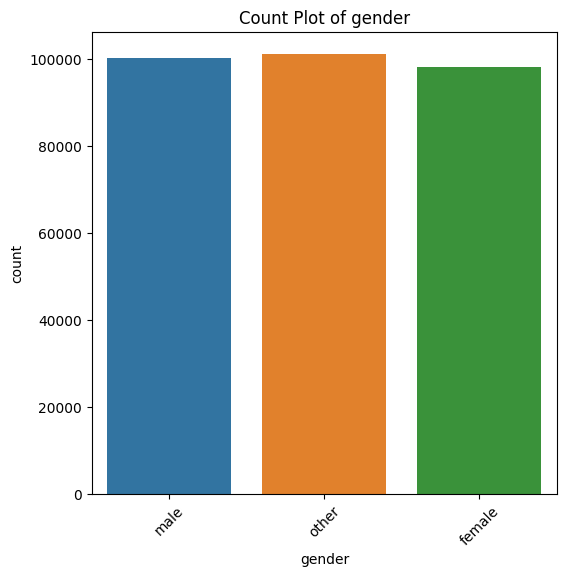

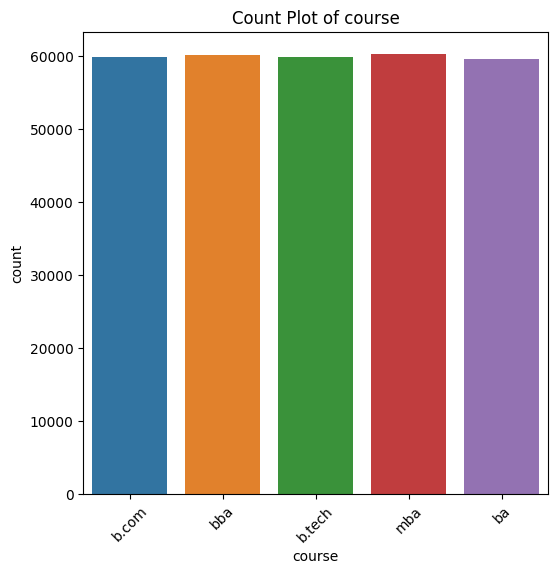

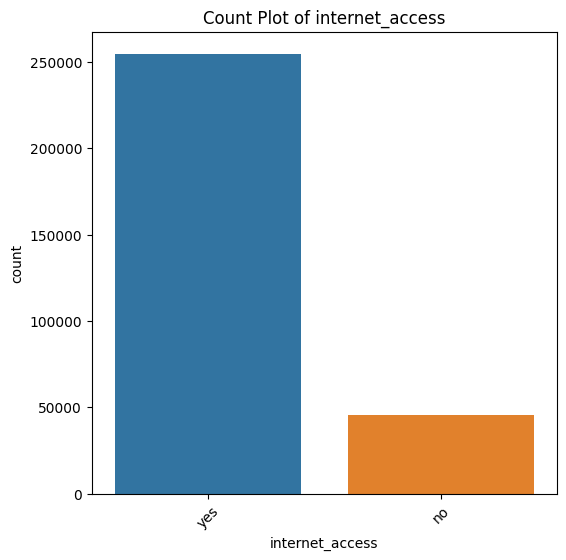

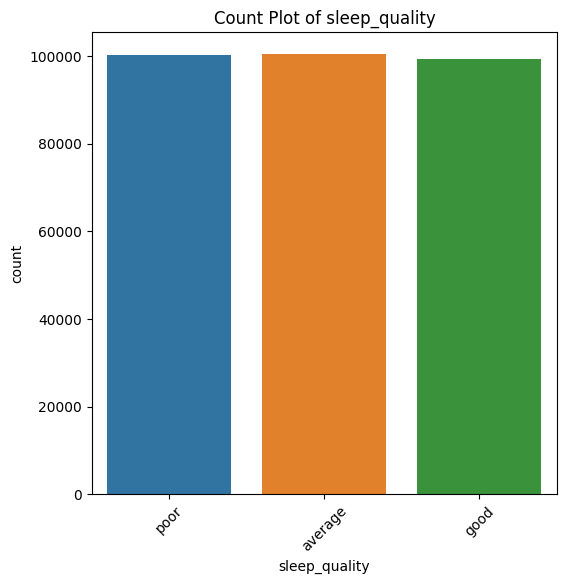

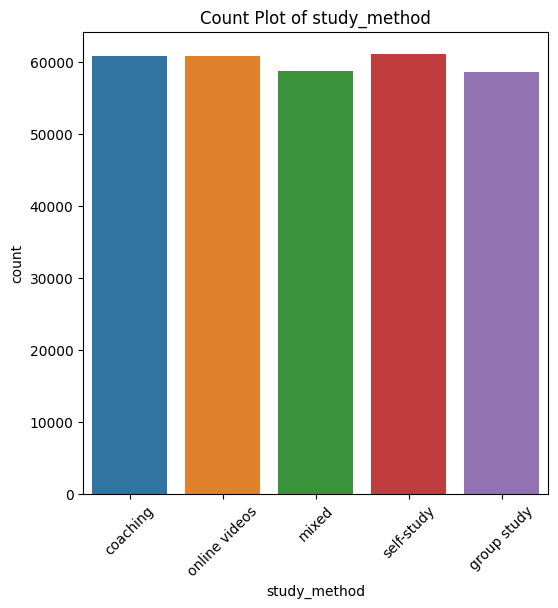

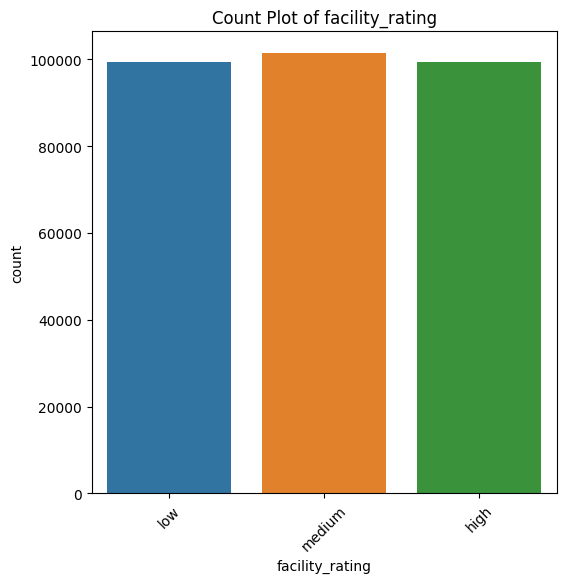

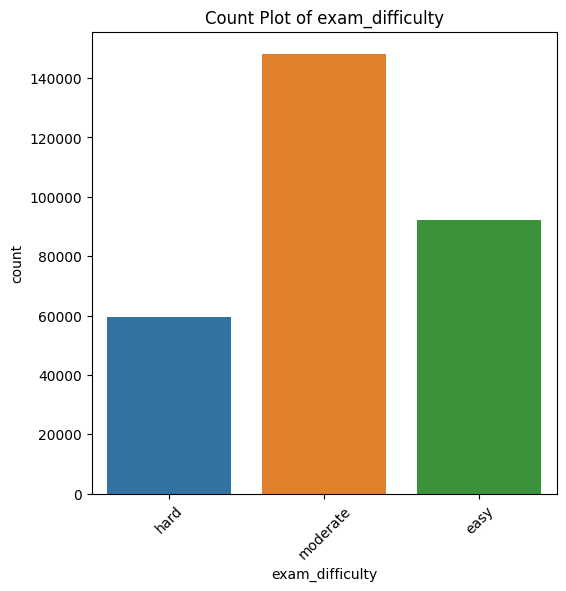

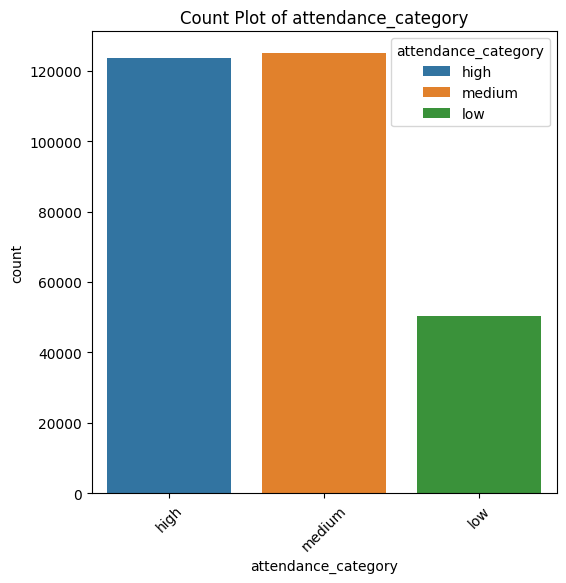

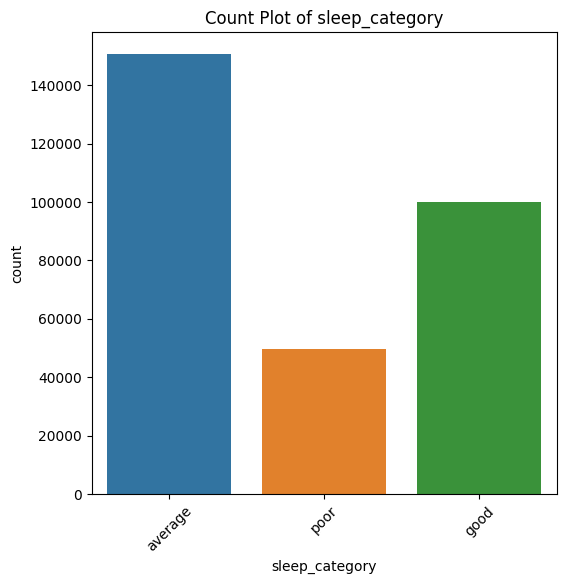

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# select categorical columns
categorical_columns = exam_df.select_dtypes(include=["object"]).columns.tolist()

# loop through categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6,6))
    sns.countplot(data=exam_df, x=col, hue=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


Most High_scoring students are:

 * Gender               :others
 * course               :MBA
 * Internet access      :yes
 * sleep_quality        :Average
 * study material       :self-study
 * facility rating      :medium
 * Exam difficulty      :Moderate
 * Attendence category  :medium
 * sleep category       :Average

In [16]:
# create a new column based the target column exam score

exam_df["Result"]=exam_df["exam_score"].apply(lambda x: "pass" if  x>=50 else "fail")

In [17]:
exam_df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category,Result
0,1,17.000000,male,b.com,2.780000,92.900000,yes,7.400000,poor,coaching,low,hard,58.900000,15.582011,high,average,pass
1,2,23.000000,other,bba,3.370000,64.800000,yes,4.600000,average,online videos,medium,moderate,54.800000,12.540046,medium,poor,pass
2,3,22.000000,male,b.tech,7.880000,76.800000,yes,8.500000,poor,coaching,high,moderate,90.300000,10.168919,high,good,pass
3,4,20.000000,other,b.com,0.670000,48.400000,yes,5.800000,average,online videos,low,moderate,29.700000,17.784431,low,average,fail
4,5,20.000000,female,mba,0.890000,71.600000,yes,9.800000,poor,coaching,low,moderate,43.700000,23.121693,medium,good,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,13310,20.770347,male,ba,0.803922,82.230530,yes,9.813947,good,online videos,medium,hard,59.912258,33.212219,high,good,pass
299996,15226,22.020964,male,ba,7.803425,52.944351,yes,6.597618,poor,self-study,high,easy,53.875311,6.119812,medium,average,pass
299997,6522,17.183306,female,b.tech,3.917551,60.271365,yes,7.962057,poor,online videos,high,easy,79.174552,16.100404,medium,average,pass
299998,2782,24.047111,female,b.com,0.225627,83.853544,yes,8.794792,good,group study,low,easy,43.476208,35.472613,high,good,fail


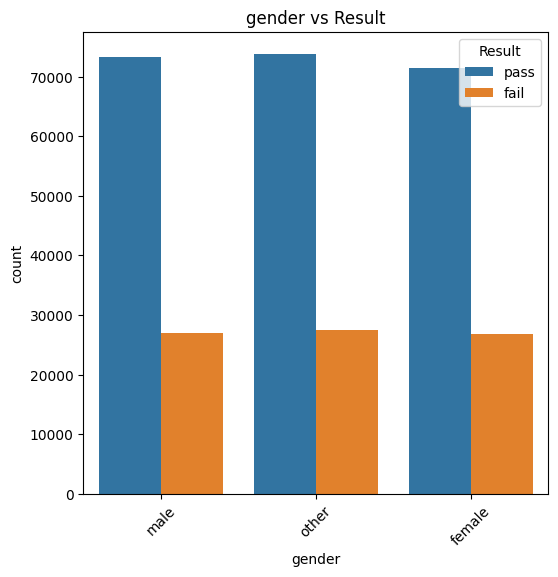

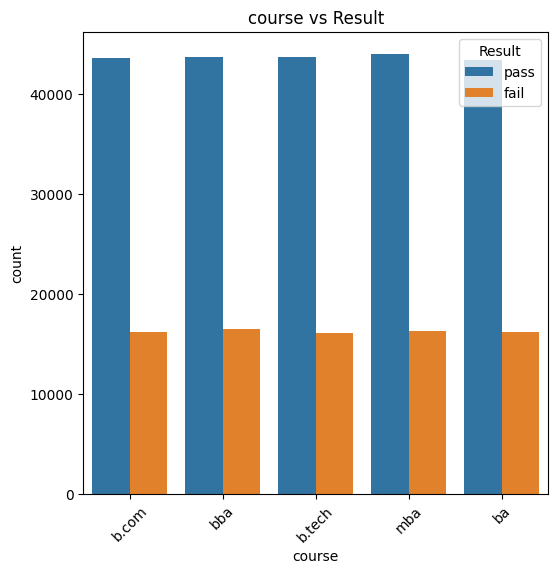

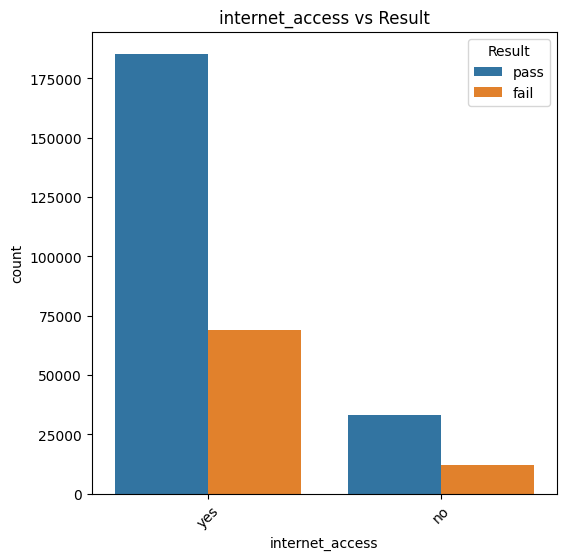

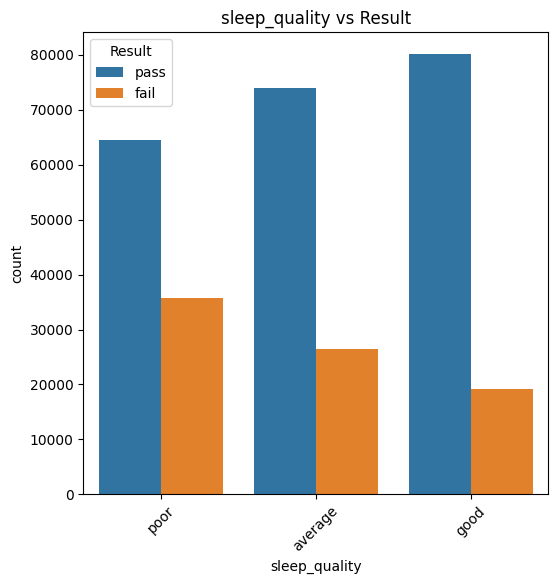

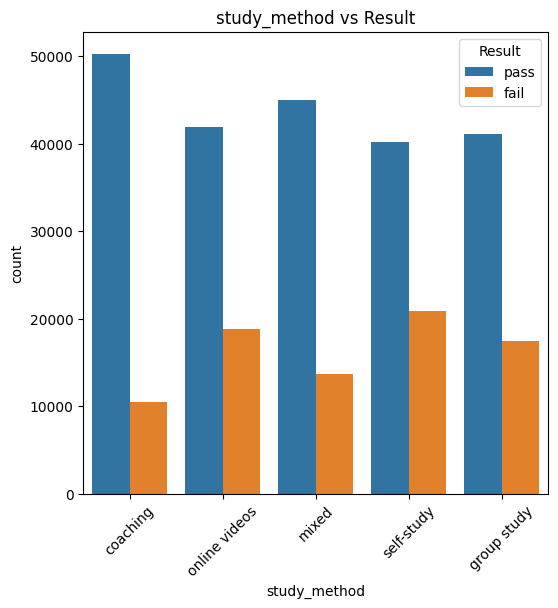

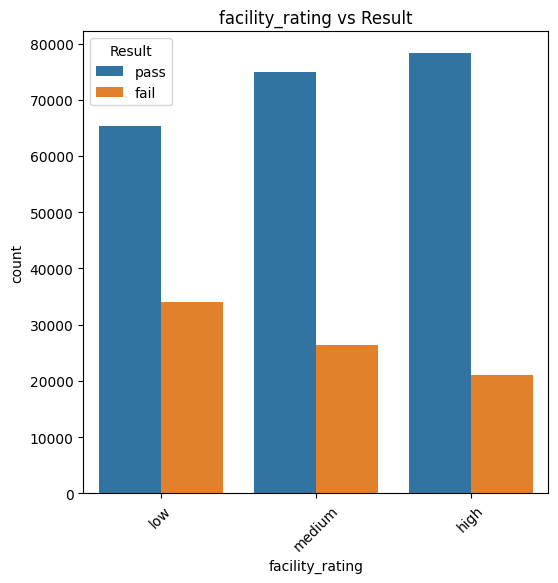

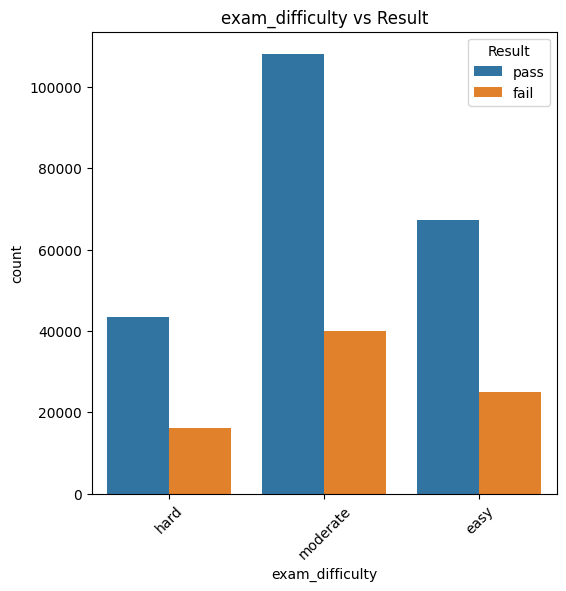

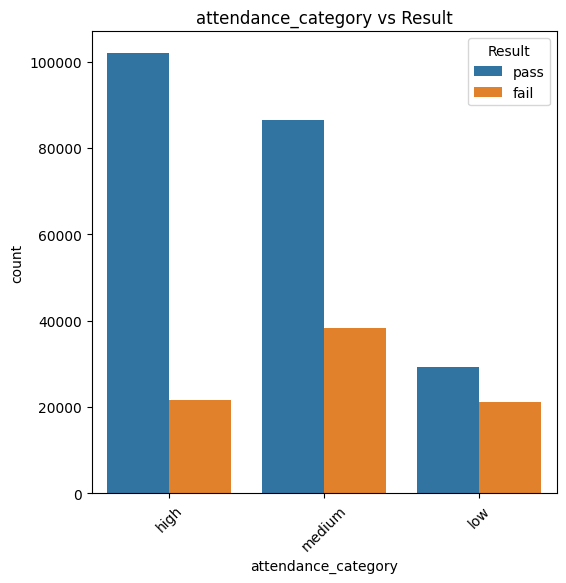

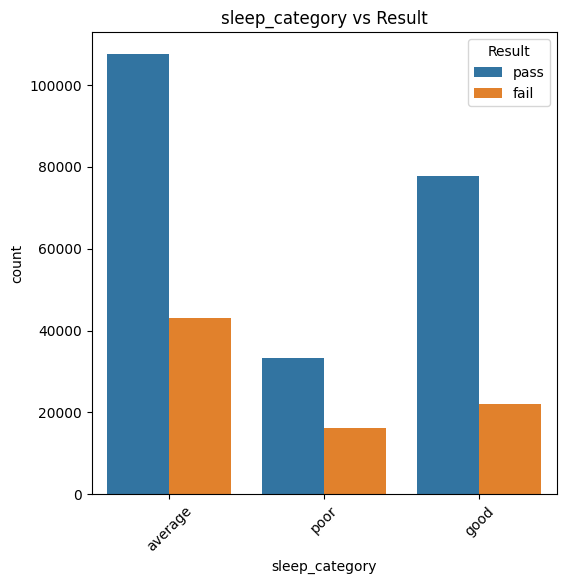

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = exam_df.select_dtypes(include="object").columns

for col in categorical_columns:
    if col != "Result":
        plt.figure(figsize=(6,6))
        sns.countplot(data=exam_df, x=col, hue="Result")
        plt.title(f"{col} vs Result")
        plt.xticks(rotation=45)
        plt.show()


The majority of students pass the exam across all categories (there might be other factors affecting the exam score).

In [20]:
exam_df.select_dtypes(include=['int64','float64']).columns.tolist()


['student_id',
 'age',
 'study_hours',
 'class_attendance',
 'sleep_hours',
 'exam_score',
 'study_efficiency']

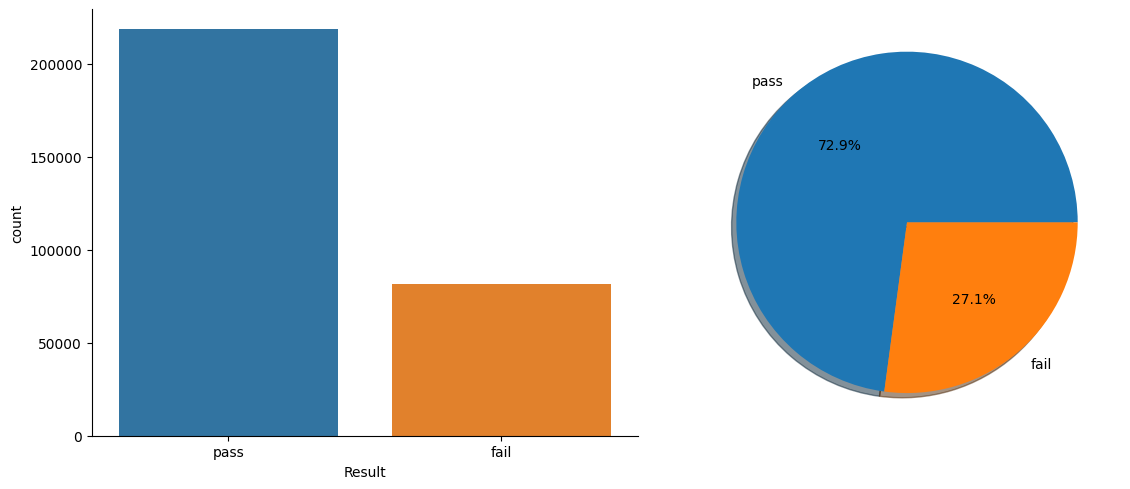

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Bar plot (count of Pass / Fail)
plt.subplot(1,2,1)
sns.countplot(data=exam_df, x="Result", hue="Result")
sns.despine()

# Pie chart (composition)
plt.subplot(1,2,2)
exam_df["Result"].value_counts().plot.pie(
    autopct="%1.1f%%", shadow=True
)
plt.ylabel("")

plt.tight_layout()
plt.show()


In [23]:
exam_df["Result_num"] = exam_df["Result"].map({"fail": 0, "pass": 1})


In [24]:
exam_df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category,Result,Result_num
0,1,17.000000,male,b.com,2.780000,92.900000,yes,7.400000,poor,coaching,low,hard,58.900000,15.582011,high,average,pass,1
1,2,23.000000,other,bba,3.370000,64.800000,yes,4.600000,average,online videos,medium,moderate,54.800000,12.540046,medium,poor,pass,1
2,3,22.000000,male,b.tech,7.880000,76.800000,yes,8.500000,poor,coaching,high,moderate,90.300000,10.168919,high,good,pass,1
3,4,20.000000,other,b.com,0.670000,48.400000,yes,5.800000,average,online videos,low,moderate,29.700000,17.784431,low,average,fail,0
4,5,20.000000,female,mba,0.890000,71.600000,yes,9.800000,poor,coaching,low,moderate,43.700000,23.121693,medium,good,fail,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,13310,20.770347,male,ba,0.803922,82.230530,yes,9.813947,good,online videos,medium,hard,59.912258,33.212219,high,good,pass,1
299996,15226,22.020964,male,ba,7.803425,52.944351,yes,6.597618,poor,self-study,high,easy,53.875311,6.119812,medium,average,pass,1
299997,6522,17.183306,female,b.tech,3.917551,60.271365,yes,7.962057,poor,online videos,high,easy,79.174552,16.100404,medium,average,pass,1
299998,2782,24.047111,female,b.com,0.225627,83.853544,yes,8.794792,good,group study,low,easy,43.476208,35.472613,high,good,fail,0


# data cleaning

In [25]:
exam_df.isnull().sum()

student_id                0
age                       0
gender                    0
course                    0
study_hours               0
class_attendance          0
internet_access           0
sleep_hours               0
sleep_quality             0
study_method              0
facility_rating           0
exam_difficulty           0
exam_score                0
study_efficiency          0
attendance_category    1219
sleep_category            0
Result                    0
Result_num                0
dtype: int64

In [26]:
exam_df["attendance_category"].fillna(exam_df["attendance_category"].mode()[0],inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_18112\2528426664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exam_df["attendance_category"].fillna(exam_df["attendance_category"].mode()[0],inplace=True)


In [27]:
exam_df.duplicated().sum()

np.int64(0)

# Encoding

In [29]:
categorical_columns=exam_df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:",categorical_columns)

Categorical columns: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'attendance_category', 'sleep_category', 'Result']


# ordinal encoding

In [30]:
exam_df["sleep_quality"].unique()

array(['poor', 'average', 'good'], dtype=object)

In [31]:
exam_df['sleep_quality'] = exam_df['sleep_quality'].map(
    {'poor': 0, 'average': 1, 'good': 2}
)


In [32]:
exam_df["sleep_quality"].unique()

array([0, 1, 2])

In [33]:
exam_df["facility_rating"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [34]:
exam_df['facility_rating'] = exam_df['facility_rating'].map(
    {'low': 0, 'medium': 1, 'high': 2}
)


In [35]:
exam_df["facility_rating"].unique()

array([0, 1, 2])

In [36]:
exam_df["attendance_category"].unique()

array(['high', 'medium', 'low'], dtype=object)

In [37]:
exam_df['attendance_category'] = exam_df['attendance_category'].map(
    {'low': 0, 'medium': 1, 'high': 2}
)


In [38]:
exam_df["attendance_category"].unique()

array([2, 1, 0])

In [39]:
exam_df["sleep_category"].unique()

array(['average', 'poor', 'good'], dtype=object)

In [40]:
exam_df['sleep_category'] = exam_df['sleep_category'].map(
    {'poor': 0, 'average': 1, 'good': 2}
)


In [41]:
exam_df["sleep_category"].unique()


array([1, 0, 2])

In [42]:
exam_df["exam_difficulty"].unique()


array(['hard', 'moderate', 'easy'], dtype=object)

In [43]:
exam_df['exam_difficulty'] = exam_df['exam_difficulty'].map(
    {'easy': 0, 'moderate': 1, 'hard': 2}
)


In [44]:
exam_df["exam_difficulty"].unique()


array([2, 1, 0])

# label encoding

In [45]:
exam_df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category,Result,Result_num
0,1,17.000000,male,b.com,2.780000,92.900000,yes,7.400000,0,coaching,0,2,58.900000,15.582011,2,1,pass,1
1,2,23.000000,other,bba,3.370000,64.800000,yes,4.600000,1,online videos,1,1,54.800000,12.540046,1,0,pass,1
2,3,22.000000,male,b.tech,7.880000,76.800000,yes,8.500000,0,coaching,2,1,90.300000,10.168919,2,2,pass,1
3,4,20.000000,other,b.com,0.670000,48.400000,yes,5.800000,1,online videos,0,1,29.700000,17.784431,0,1,fail,0
4,5,20.000000,female,mba,0.890000,71.600000,yes,9.800000,0,coaching,0,1,43.700000,23.121693,1,2,fail,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,13310,20.770347,male,ba,0.803922,82.230530,yes,9.813947,2,online videos,1,2,59.912258,33.212219,2,2,pass,1
299996,15226,22.020964,male,ba,7.803425,52.944351,yes,6.597618,0,self-study,2,0,53.875311,6.119812,1,1,pass,1
299997,6522,17.183306,female,b.tech,3.917551,60.271365,yes,7.962057,0,online videos,2,0,79.174552,16.100404,1,1,pass,1
299998,2782,24.047111,female,b.com,0.225627,83.853544,yes,8.794792,2,group study,0,0,43.476208,35.472613,2,2,fail,0


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ["gender","course","internet_access","study_method","Result"]:
    exam_df[col]=le.fit_transform(exam_df[col])

# data transformation

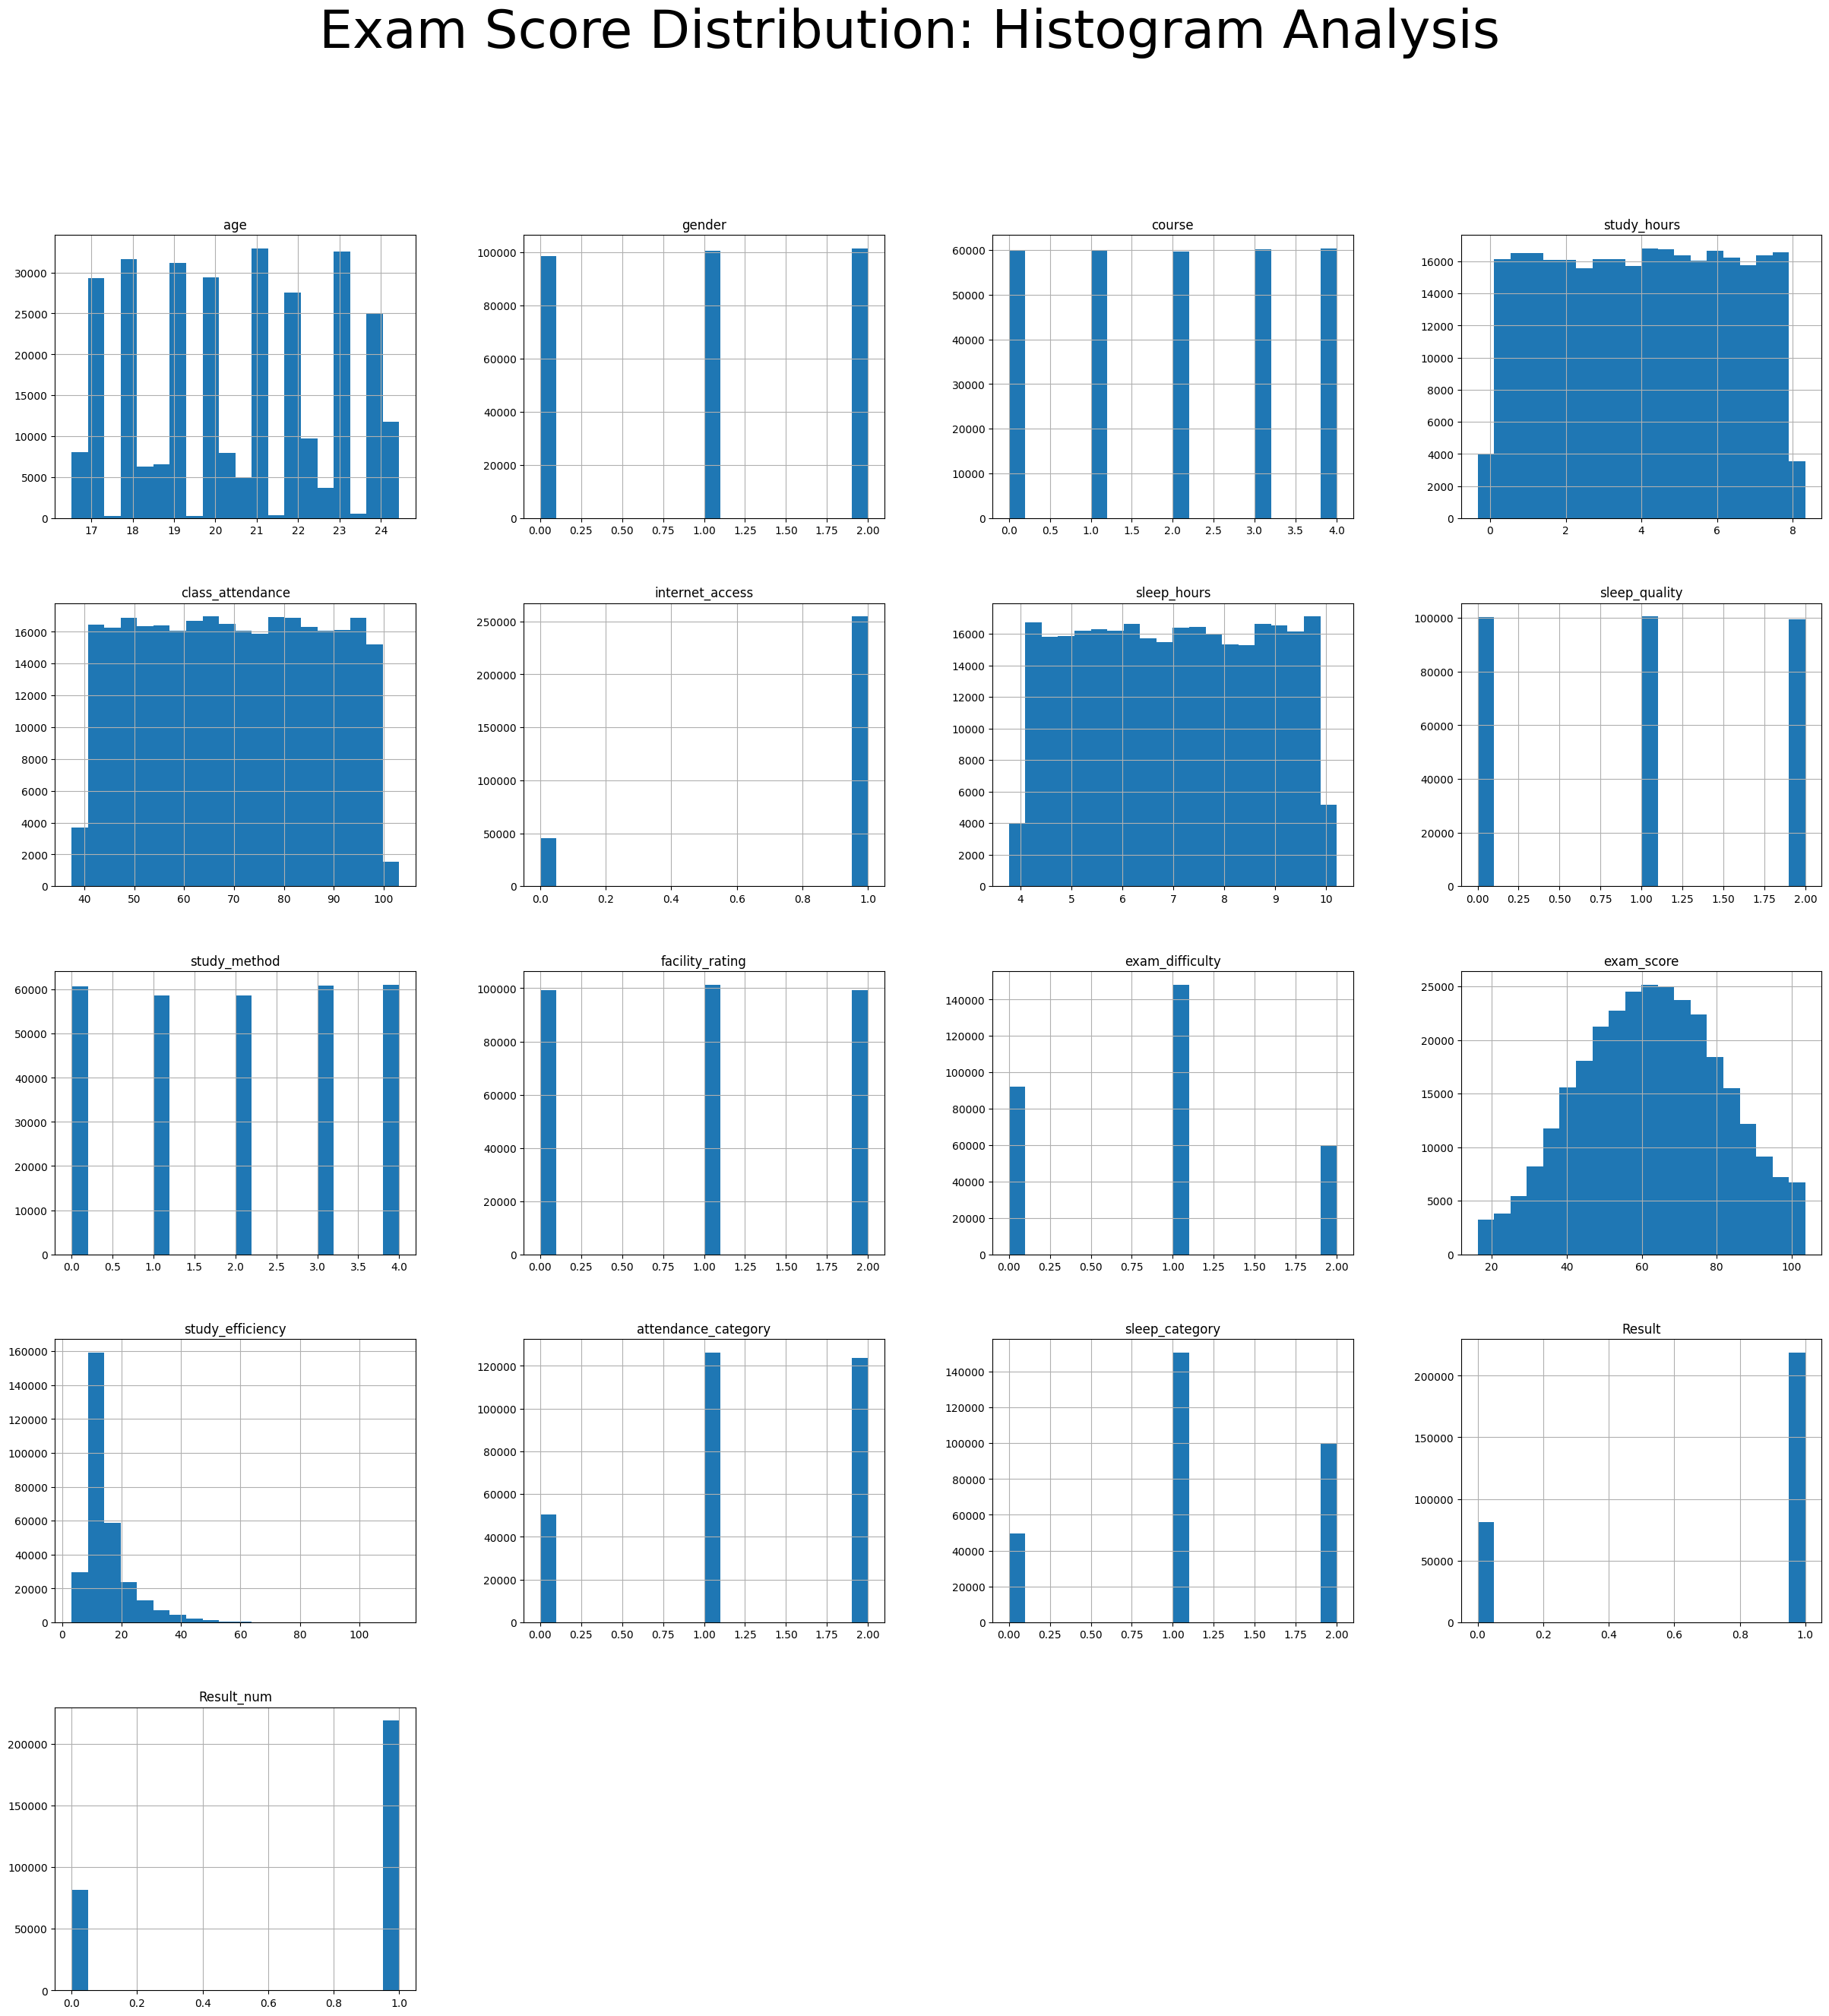

In [47]:
# Assume Student_ID is the first column
exam_df.iloc[:, 1:].hist(bins=20, figsize=(30,30))

plt.suptitle("Exam Score Distribution: Histogram Analysis", fontsize=50)
plt.show()


# skewness 

In [48]:
exam_df.skew(numeric_only=True)


student_id             0.004214
age                    0.013100
gender                -0.018243
course                -0.004277
study_hours           -0.007071
class_attendance       0.003399
internet_access       -1.944644
sleep_hours            0.000579
sleep_quality          0.005432
study_method          -0.014518
facility_rating        0.000354
exam_difficulty        0.154963
exam_score            -0.046839
study_efficiency       2.280237
attendance_category   -0.403223
sleep_category        -0.228059
Result                -1.028952
Result_num            -1.028952
dtype: float64

In [49]:
# create a copy of original data for comparison:

exam_df_copy=exam_df.copy()

# log transformation of skewness column (study_efficiency):

exam_df["study_efficiency"]=np.log1p(exam_df["study_efficiency"])

The log1p function in Numpy stands for log(1+x) where "1p" refers to adding 1 to the input value before taking the logarithm


# removing unwanted features

In [51]:
exam_df

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,study_efficiency,attendance_category,sleep_category,Result,Result_num
0,1,17.000000,1,0,2.780000,92.900000,1,7.400000,0,0,0,2,58.900000,2.808318,2,1,1,1
1,2,23.000000,2,3,3.370000,64.800000,1,4.600000,1,3,1,1,54.800000,2.605652,1,0,1,1
2,3,22.000000,1,1,7.880000,76.800000,1,8.500000,0,0,2,1,90.300000,2.413135,2,2,1,1
3,4,20.000000,2,0,0.670000,48.400000,1,5.800000,1,3,0,1,29.700000,2.933028,0,1,0,0
4,5,20.000000,0,4,0.890000,71.600000,1,9.800000,0,0,0,1,43.700000,3.183112,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,13310,20.770347,1,2,0.803922,82.230530,1,9.813947,2,3,1,2,59.912258,3.532583,2,2,1,1
299996,15226,22.020964,1,2,7.803425,52.944351,1,6.597618,0,4,2,0,53.875311,1.962881,1,1,1,1
299997,6522,17.183306,0,1,3.917551,60.271365,1,7.962057,0,3,2,0,79.174552,2.839102,1,1,1,1
299998,2782,24.047111,0,0,0.225627,83.853544,1,8.794792,2,1,0,0,43.476208,3.596562,2,2,0,0


In [52]:
correlation_matrix=exam_df.corr()
threshold=0.5  # set the correlation threshold

# find pairs of faetures with high correlation:

highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold:

        if abs(correlation_matrix.iloc[i,j])>threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))

#  print all pairs of highly correlated features:
print(highly_correlated_pairs)


[('exam_score', 'study_hours'), ('study_efficiency', 'study_hours'), ('attendance_category', 'class_attendance'), ('sleep_category', 'sleep_hours'), ('Result', 'study_hours'), ('Result', 'exam_score'), ('Result_num', 'study_hours'), ('Result_num', 'exam_score'), ('Result_num', 'Result')]


In [53]:
exam_df.drop(['study_efficiency','Result_num','sleep_category'],axis=1,inplace=True)

<Axes: >

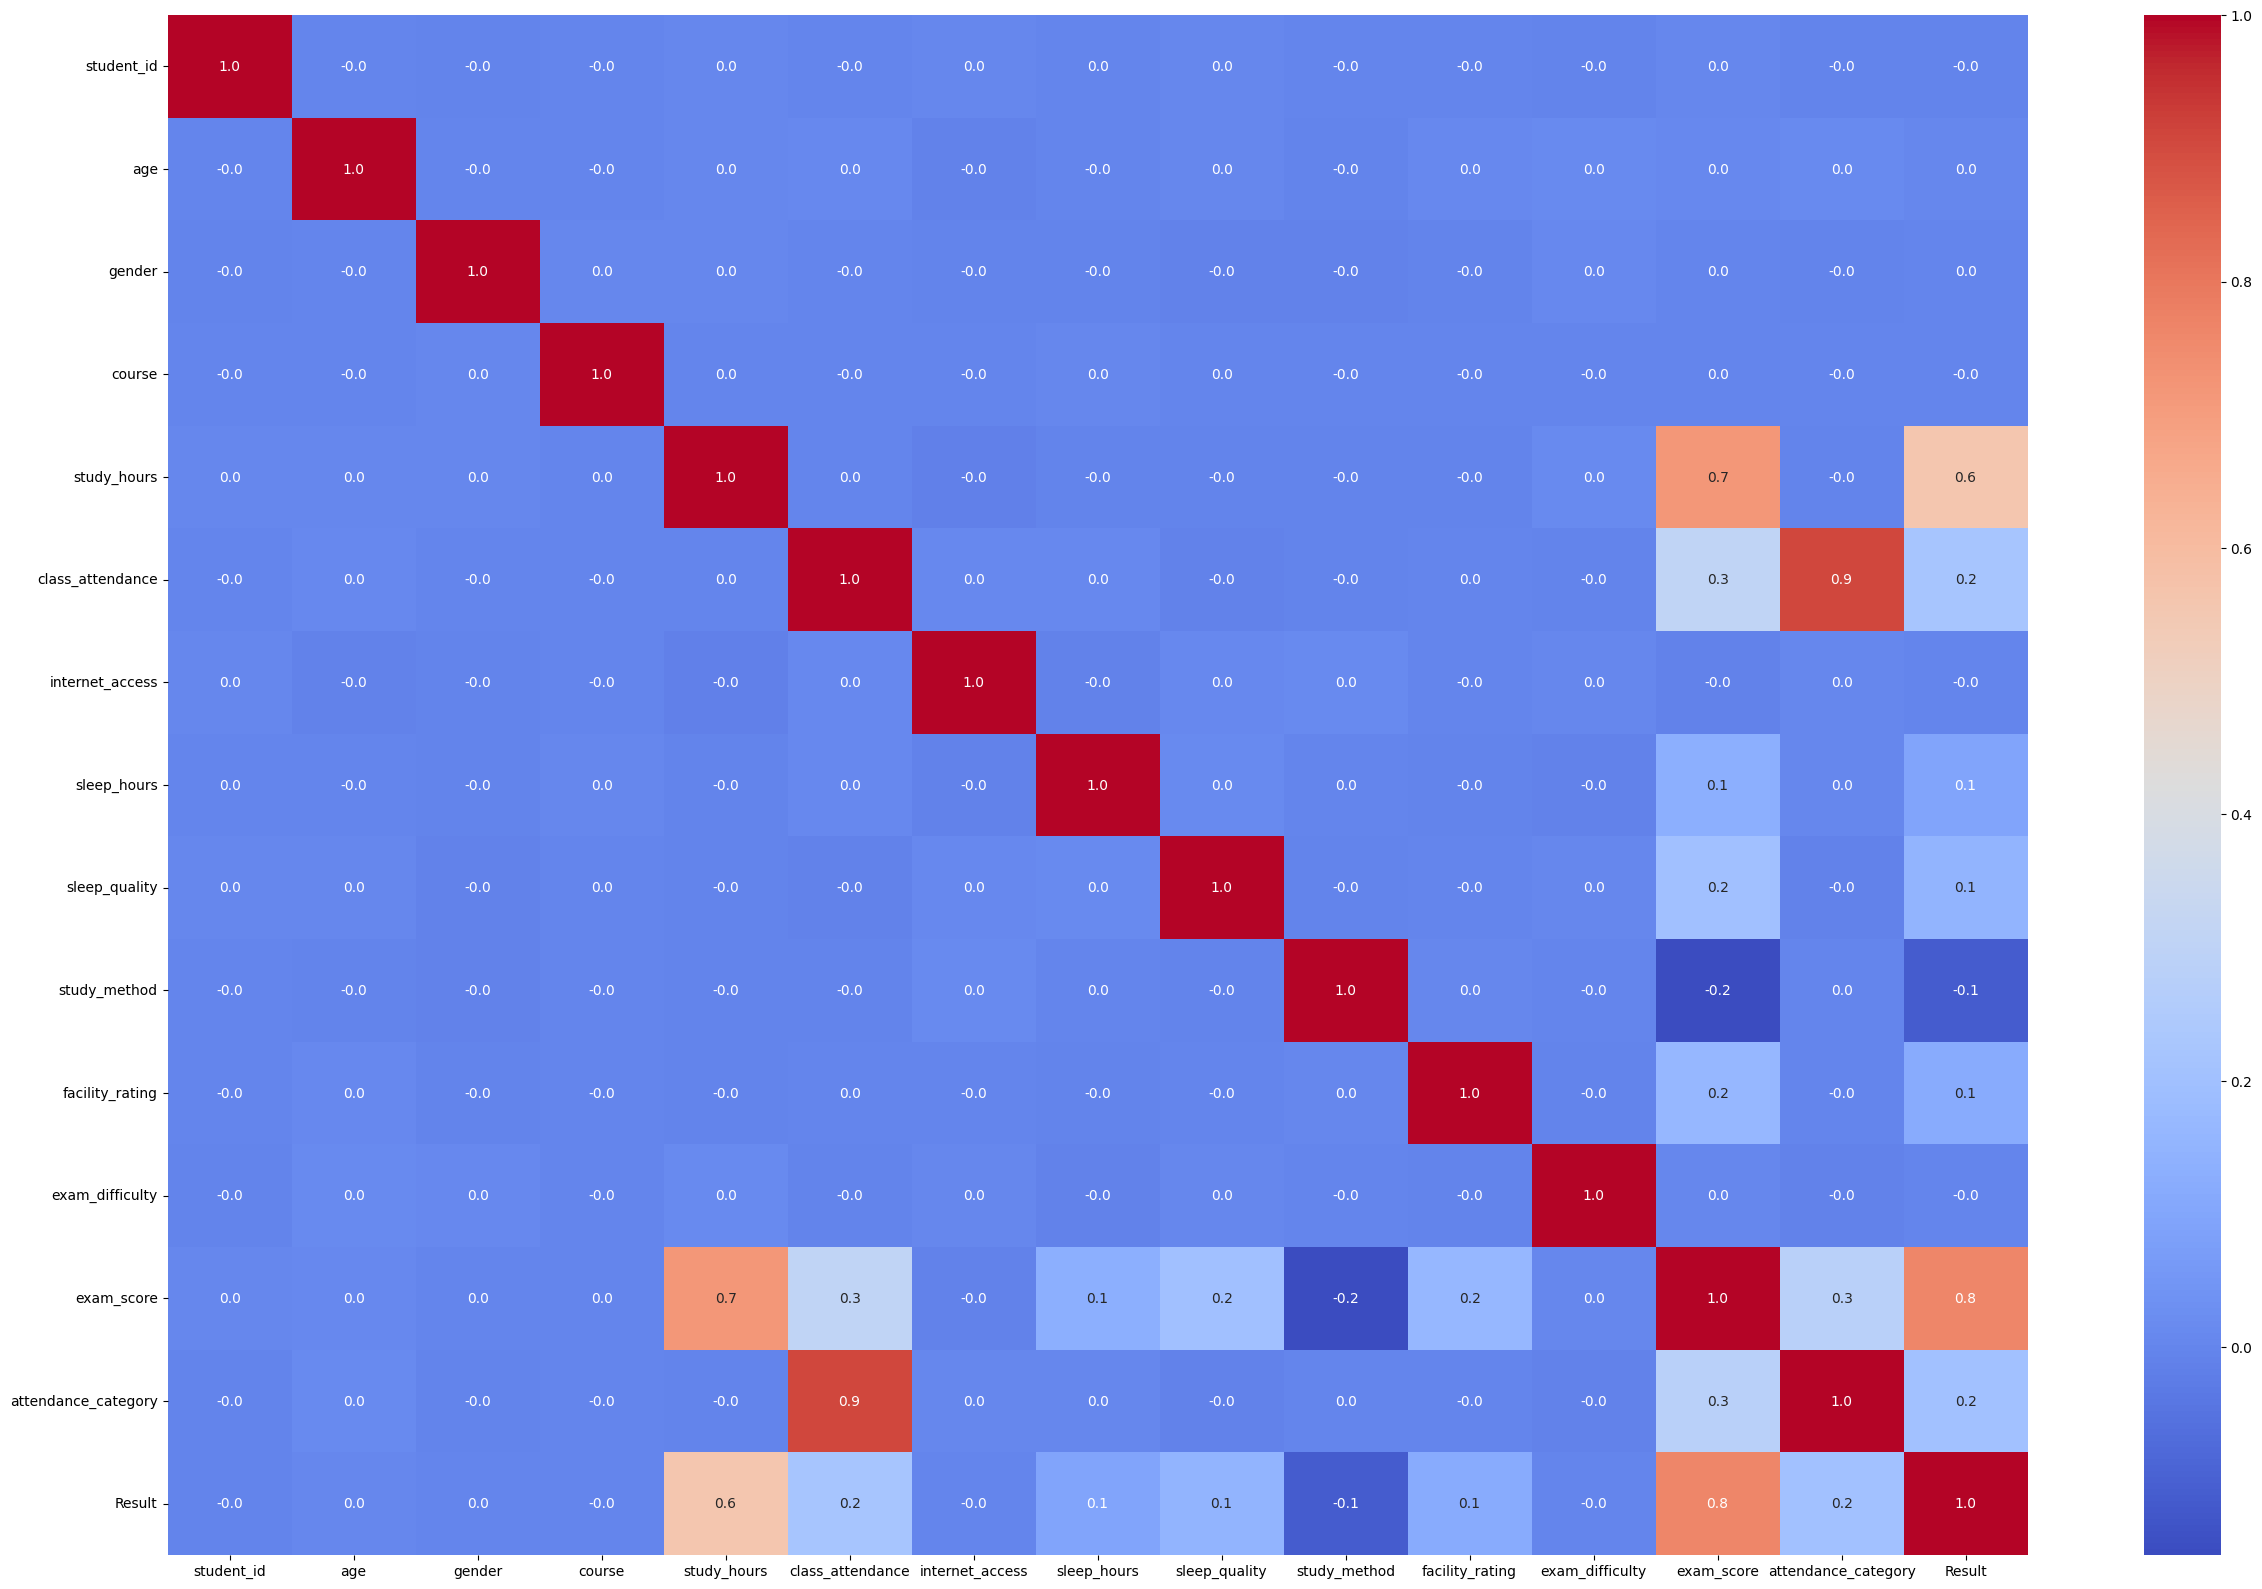

In [54]:
plt.figure(figsize=(30,20))
exam_df.corr(numeric_only=True)
sns.heatmap(exam_df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt="0.01f")

In [55]:
exam_df.drop(['attendance_category'],axis=1,inplace=True)

# boxplot

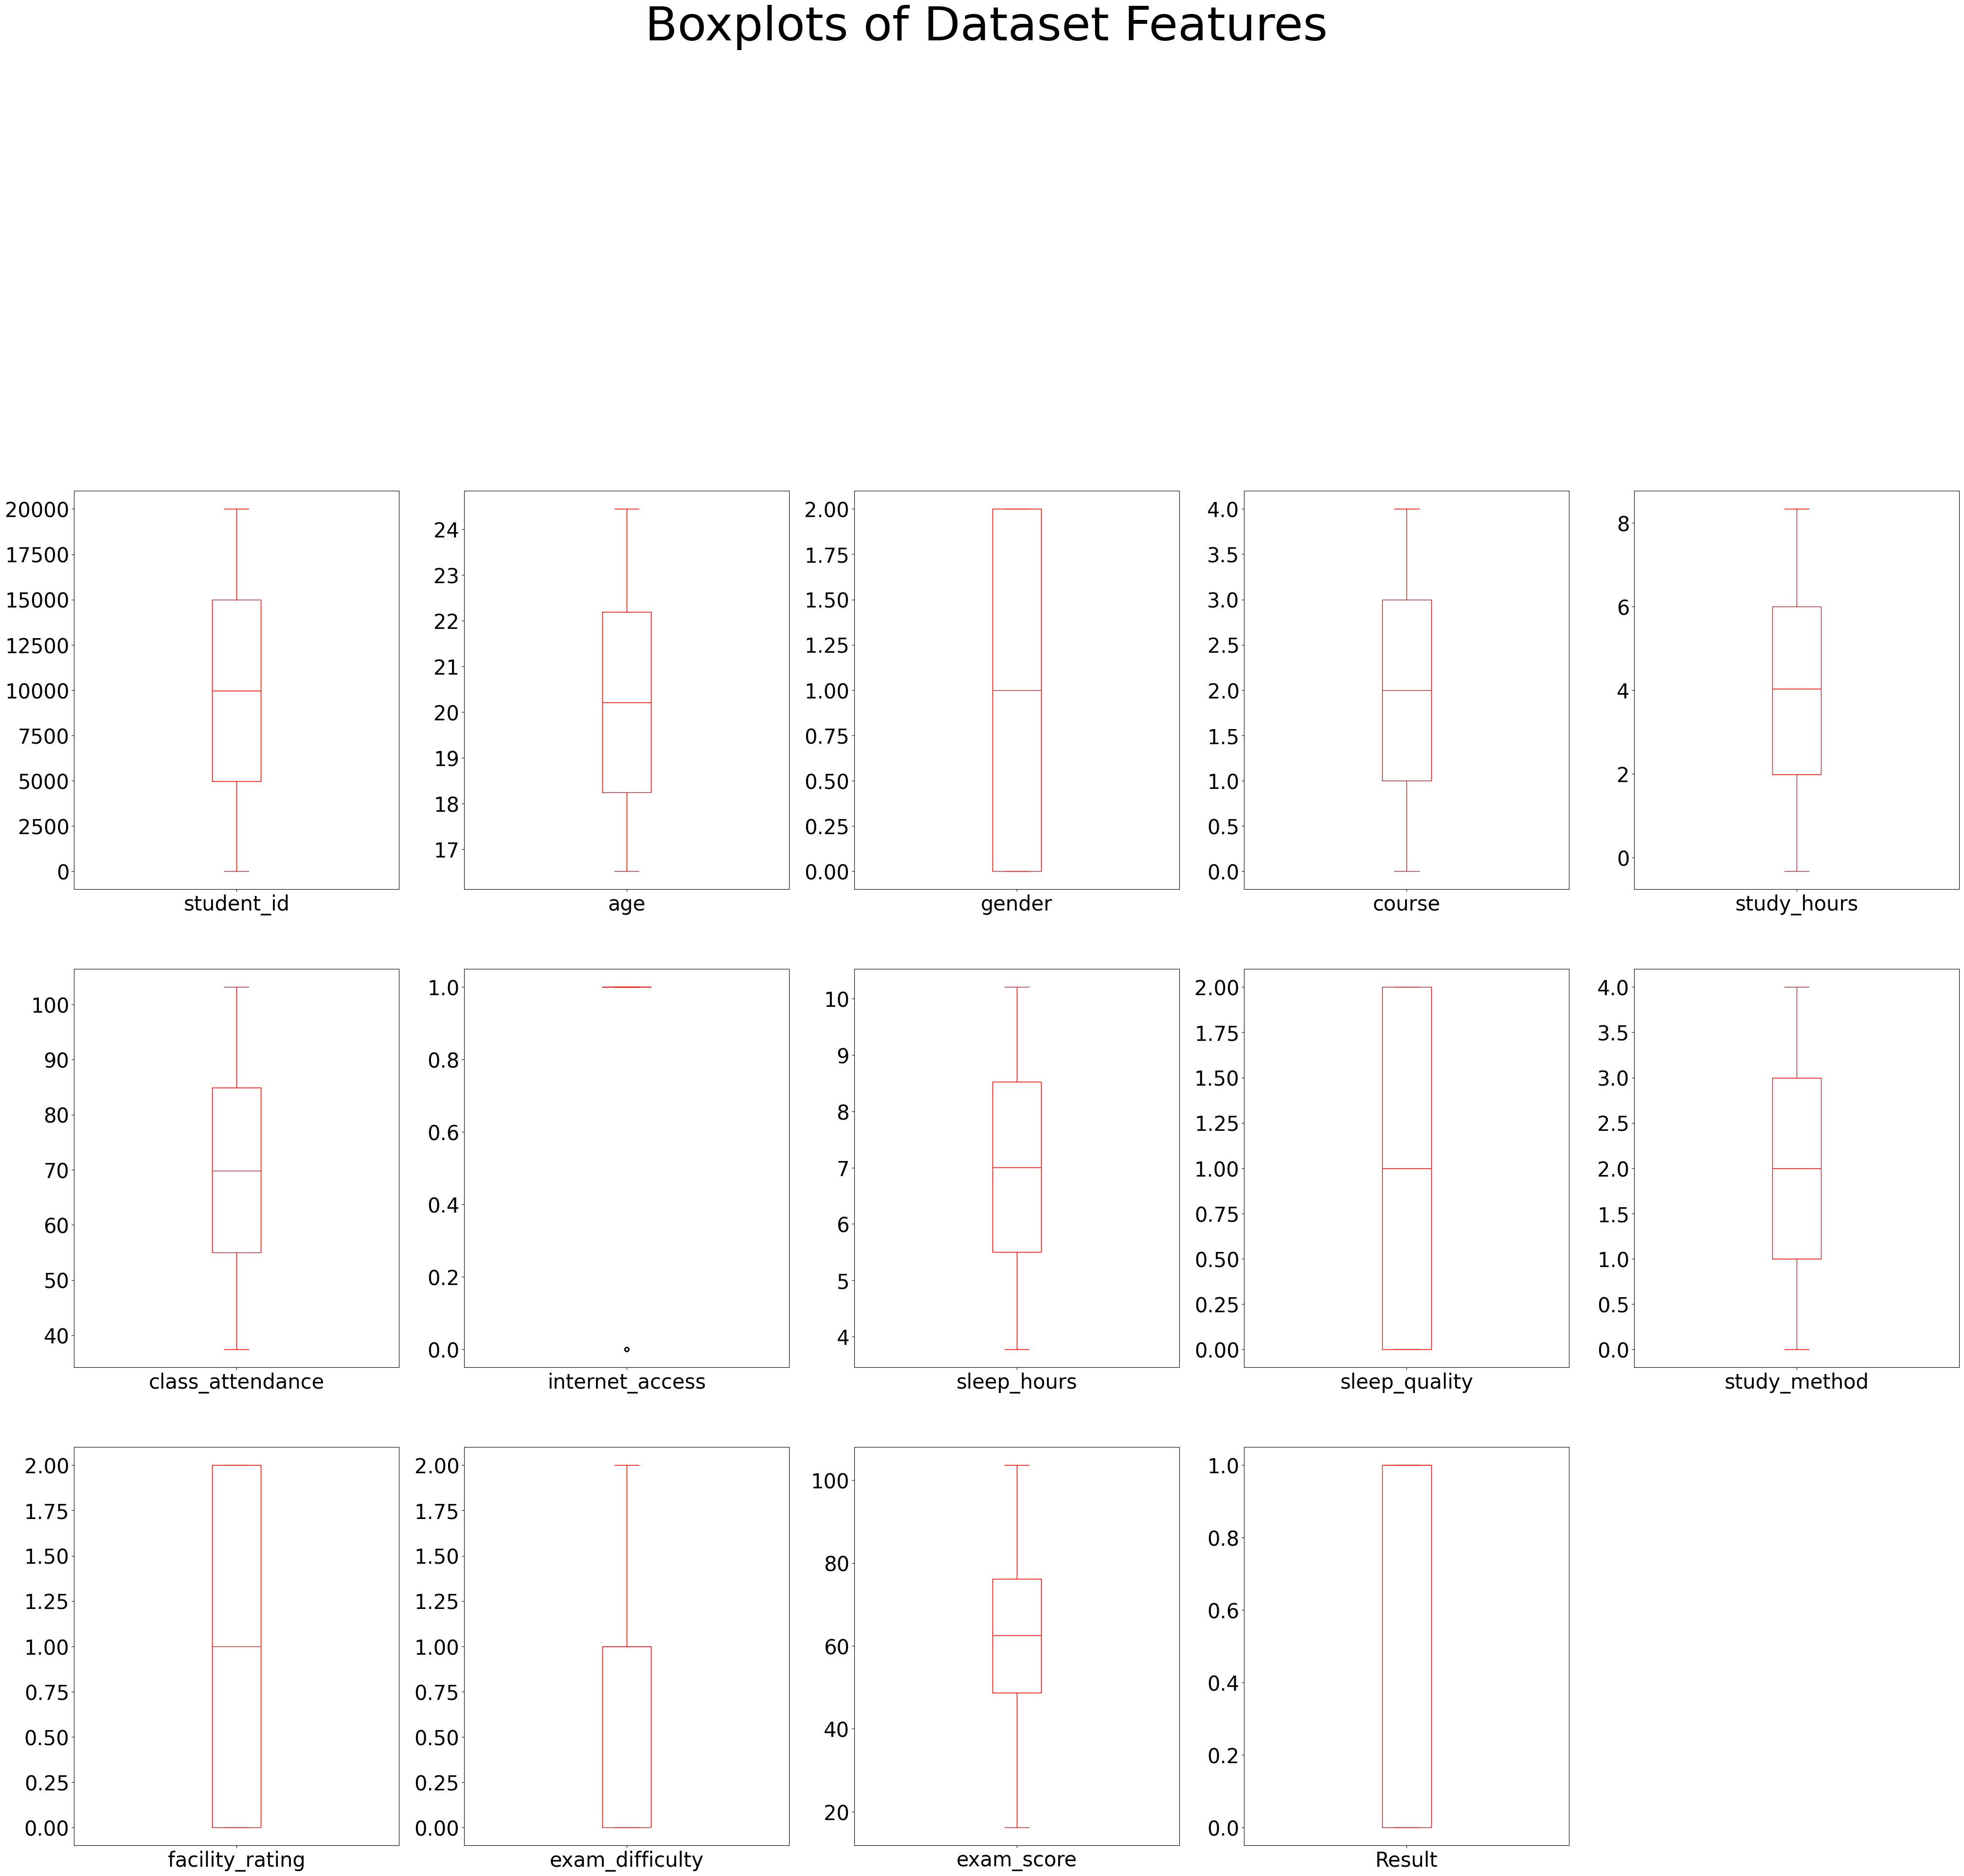

In [56]:
exam_df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=30)
plt.suptitle("Boxplots of Dataset Features",fontsize=70)
plt.show()

In [57]:
exam_df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score',
       'Result'],
      dtype='object')

# model building

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,root_mean_squared_error

# Features
X = exam_df.drop("exam_score", axis=1)

# Target
y = exam_df["exam_score"]

print(X.shape, y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# # Random Forest Regressor model
# model = RandomForestRegressor(
#     n_estimators=200,
#     random_state=42,
#       n_jobs=-1

# )
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)


# Train the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation

print("MAE:",mean_absolute_error(y_test,y_pred))         
print("R2 Score:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)





(300000, 13) (300000,)
MAE: 2.673991090672073
R2 Score: 0.9612689559740033
RMSE: 3.733875563852904


# final report

* This project presents an end-to-end machine learning workflow using real-world student performance data.
*  It includes problem definition, data inspection, preprocessing (handling missing values, IQR-based outlier treatment, feature engineering), categorical encoding, and feature scaling.
* Exploratory Data Analysis (EDA) was performed to identify data patterns and key factors affecting exam scores.
* The Gradient Boosting Regressor was selected as the final model 
* The data was split into training and testing sets, and multiple regression models were evaluated using MAE, MSE, RMSE, and R² score.
* after created pickle file to depoly

In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor

r_model=GradientBoostingRegressor()
r_model.fit(X_train,y_train.values.ravel())
with open("regression_model.pk1","wb")as file:
    pickle.dump(r_model,file)

print("Model saved successfully as exam_score_random_forest.pkl")


In [ ]:
import pickle

# Load the saved model
with open(r"C:\Users\Pc\OneDrive\Desktop\project EDA\regression_model.pk1", "rb") as file:
    loaded_model = pickle.load(file)

# Test prediction
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded


array([40.06737738, 39.93346684, 56.16928115, ..., 45.94697048,
       61.3494547 , 63.5654546 ], shape=(60000,))

In [ ]:
exam_df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score',
       'Result'],
      dtype='object')

In [ ]:
exam_df["course"].unique()

array([0, 3, 1, 4, 2])

# deploy

In [ ]:
import gradio as gr
import pickle
import pandas as pd

# -----------------------------
# Load trained model
# -----------------------------
with open("regression_model.pk1", "rb") as f:
    model = pickle.load(f)

# -----------------------------
# Feature columns (MATCH TRAINING)
# -----------------------------
FEATURE_COLUMNS = [
    "student_id",
    "age",
    "gender",
    "course",
    "study_hours",
    "class_attendance",
    "internet_access",
    "sleep_hours",
    "sleep_quality",
    "study_method",
    "facility_rating",
    "exam_difficulty",
    "Result"
]

# -----------------------------
# Encoding maps (MATCH DATASET)
# -----------------------------
gender_map = {"male": 1, "female": 0, "other": 2}

course_map = {
    "b.com": 0,
    "bba": 1,
    "b.tech": 2,
    "mba": 3,
    "ba": 4
}

internet_map = {"yes": 1, "no": 0}

study_method_map = {
    "self-study": 0,
    "online videos": 1,
    "coaching": 2,
    "group study": 3,
    "mixed": 4
}

facility_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

sleep_quality_map = {
    "poor": 0,
    "average": 1,
    "good": 2
}

exam_difficulty_map = {
    "easy": 0,
    "moderate": 1,
    "hard": 2
}

# -----------------------------
# Prediction function
# -----------------------------
def predict_exam_score(
    age, gender, course, study_hours, class_attendance,
    internet_access, sleep_hours, sleep_quality,
    study_method, facility_rating, exam_difficulty
):

    input_df = pd.DataFrame([[
        0,  # dummy student_id
        age,
        gender_map[gender],
        course_map[course],
        study_hours,
        class_attendance,
        internet_map[internet_access],
        sleep_hours,
        sleep_quality_map[sleep_quality],
        study_method_map[study_method],
        facility_map[facility_rating],
        exam_difficulty_map[exam_difficulty],
        0   # dummy Result
    ]], columns=FEATURE_COLUMNS)

    prediction = model.predict(input_df)[0]
    return round(prediction, 2)

# -----------------------------
# Gradio UI
# -----------------------------
app = gr.Interface(
    fn=predict_exam_score,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(["male", "female", "other"], label="Gender"),
        gr.Dropdown(["b.com", "bba", "b.tech", "mba", "ba"], label="Course"),
        gr.Number(label="Study Hours"),
        gr.Number(label="Class Attendance (%)"),
        gr.Dropdown(["yes", "no"], label="Internet Access"),
        gr.Number(label="Sleep Hours"),
        gr.Dropdown(["poor", "average", "good"], label="Sleep Quality"),
        gr.Dropdown(
            ["self-study", "online videos", "coaching", "group study", "mixed"],
            label="Study Method"
        ),
        gr.Dropdown(["low", "medium", "high"], label="Facility Rating"),
        gr.Dropdown(["easy", "moderate", "hard"], label="Exam Difficulty")
    ],
    outputs=gr.Number(label="Predicted Exam Score"),
    title="📘 Exam Score Prediction System",
    description="Predict student exam score using a trained regression model."
)

if __name__ == "__main__":
    app.launch()


C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
